<font size="6"><b>MLP Neural Networks - Part III</b></font>

![Figure_14](img/Figure_14.png)

# Libraries

In [85]:
import pandas as pd
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import xgboost as xgb
sns.set_style('darkgrid')
pd.set_option('display.max_columns', None)
import datetime, warnings, scipy
warnings.filterwarnings("ignore")

import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Conv2D , SeparableConv2D, MaxPool2D, Flatten , Dropout , BatchNormalization
from keras.layers import Dense
from sklearn import preprocessing
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

# Data Loading

In [2]:
dfm_ready = pd.read_csv('dfm_ready.csv', index_col=0)
dfm_ready.head().append(dfm_ready.tail())

,DEP_DELAY,CRS_ELAPSED_TIME,AIR_TIME,DISTANCE,FLIGHT_STATUS,OP_CARRIER_Allegiant Air,OP_CARRIER_American Airlines,OP_CARRIER_Delta Airlines,OP_CARRIER_Endeavor Air,OP_CARRIER_Envoy Air,OP_CARRIER_ExpressJet,OP_CARRIER_Frontier Airlines,OP_CARRIER_Hawaiian Airlines,OP_CARRIER_JetBlue Airways,OP_CARRIER_Mesa Airline,OP_CARRIER_PSA Airlines,OP_CARRIER_Republic Airways,OP_CARRIER_SkyWest Airlines,OP_CARRIER_Southwest Airlines,OP_CARRIER_Spirit Airlines,OP_CARRIER_United Airlines,OP_CARRIER_Virgin America,DEST_Atlanta,DEST_Boston,DEST_Charlotte,DEST_Chicago,DEST_Dallas-Fort Worth,DEST_Denver,DEST_Detroit,DEST_Houston,DEST_Las Vegas,DEST_Los Angeles,DEST_Minneapolis,DEST_New York,DEST_Newark,DEST_Orlando,DEST_Philadelphia,DEST_Phoenix,DEST_Salt Lake City,DEST_San Francisco,DEST_Seattle,CRS_DEP_TIME_2,CRS_DEP_TIME_3,CRS_DEP_TIME_4,CRS_ARR_TIME_2,CRS_ARR_TIME_3,CRS_ARR_TIME_4,MONTH_2,MONTH_3,MONTH_4,MONTH_5,MONTH_6,MONTH_7,MONTH_8,MONTH_9,MONTH_10,MONTH_11,MONTH_12,WEEKDAY_1,WEEKDAY_2,WEEKDAY_3,WEEKDAY_4,WEEKDAY_5,WEEKDAY_6
0,-5.0,268.0,225.0,1605.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,-8.0,99.0,65.0,414.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,-5.0,134.0,106.0,846.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,6.0,190.0,157.0,1120.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,-3.0,206.0,173.0,1222.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7213439,31.0,182.0,142.0,1303.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
7213440,-1.0,84.0,46.0,331.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
7213441,-4.0,100.0,72.0,331.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
7213442,6.0,181.0,148.0,936.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
7213445,8.0,71.0,44.0,130.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [3]:
df = dfm_ready.astype(float)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4008257 entries, 0 to 7213445
Data columns (total 64 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   DEP_DELAY                      float64
 1   CRS_ELAPSED_TIME               float64
 2   AIR_TIME                       float64
 3   DISTANCE                       float64
 4   FLIGHT_STATUS                  float64
 5   OP_CARRIER_Allegiant Air       float64
 6   OP_CARRIER_American Airlines   float64
 7   OP_CARRIER_Delta Airlines      float64
 8   OP_CARRIER_Endeavor Air        float64
 9   OP_CARRIER_Envoy Air           float64
 10  OP_CARRIER_ExpressJet          float64
 11  OP_CARRIER_Frontier Airlines   float64
 12  OP_CARRIER_Hawaiian Airlines   float64
 13  OP_CARRIER_JetBlue Airways     float64
 14  OP_CARRIER_Mesa Airline        float64
 15  OP_CARRIER_PSA Airlines        float64
 16  OP_CARRIER_Republic Airways    float64
 17  OP_CARRIER_SkyWest Airlines    float64
 18  OP

==================================================================================

# function Library

This is a quick parenthesis to write down a few functions that I will be using to evaluate every model once finish training it. 

In [87]:
def visualize_training_results(results):
    history = results.history
    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('LOSS', fontsize=14)
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel('Loss', fontsize=12)
    plt.show()
    
    plt.figure()
    plt.plot(history['val_acc'])
    plt.plot(history['acc'])
    plt.legend(['val_acc', 'acc'])
    plt.title('ACCURACY', fontsize=14)
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel('Accuracy', fontsize=12)
    plt.show()

In [86]:
def conf_matrix(conf_mat):
    
    conf_mat = pd.DataFrame(conf_mat, index = ['0', '1'], columns = ['0', '1'])
    sns.set(font_scale=1.4)
    plt.figure(figsize = (8,7))
    sns.heatmap(conf_mat, cmap= "Blues", linecolor = 'black' , linewidth = 1, annot = True, fmt='')
    plt.xlabel('Predicted', fontsize=14)
    plt.ylabel('True', fontsize=14)
    plt.show()

In [77]:
def model_metrics(a, b):
    
    accuracy = metrics.accuracy_score(a, b)
    precision = precision_score(a, b)
    recall = recall_score(a, b)
    f1 = f1_score(a, b)
 
    print('Accuracy:', round(accuracy*100, 2),'%')
    print('Precision score:', round(precision*100, 2),'%')
    print('Recall score:', round(recall*100, 2),'%')
    print('F1 score:', round(f1*100, 2),'%')

==================================================================================

In this notebook I will drop first only the FLIGHT_STATUS (target) and the DEP_DELAY to see how good the model can get with all the features, then I will drop some additional features which I already know are causing noise to see how much the model can improve. 

If you open the Part II of the MLP Neural Network set of notebooks, you will see how there are a series of models trained with few features which perform considerably better. Still there is not full convergence which is probably due to the low number of epochs (25 or lower) so hopefully the most recent tests with 50 epochs will be done on time and will be added to that notebook.

In [6]:
y = df['FLIGHT_STATUS']
X = df.drop(['FLIGHT_STATUS', 'DEP_DELAY'], axis=1)

# Neural Network Conditions

1. Data has to be purely numerical<br>
2. Data cannot contain missing values<br>
3. Data has to be Normalized<br>

In [88]:
df.isna().sum().sum()

0

In [7]:
df.head(2)

,DEP_DELAY,CRS_ELAPSED_TIME,AIR_TIME,DISTANCE,FLIGHT_STATUS,OP_CARRIER_Allegiant Air,OP_CARRIER_American Airlines,OP_CARRIER_Delta Airlines,OP_CARRIER_Endeavor Air,OP_CARRIER_Envoy Air,OP_CARRIER_ExpressJet,OP_CARRIER_Frontier Airlines,OP_CARRIER_Hawaiian Airlines,OP_CARRIER_JetBlue Airways,OP_CARRIER_Mesa Airline,OP_CARRIER_PSA Airlines,OP_CARRIER_Republic Airways,OP_CARRIER_SkyWest Airlines,OP_CARRIER_Southwest Airlines,OP_CARRIER_Spirit Airlines,OP_CARRIER_United Airlines,OP_CARRIER_Virgin America,DEST_Atlanta,DEST_Boston,DEST_Charlotte,DEST_Chicago,DEST_Dallas-Fort Worth,DEST_Denver,DEST_Detroit,DEST_Houston,DEST_Las Vegas,DEST_Los Angeles,DEST_Minneapolis,DEST_New York,DEST_Newark,DEST_Orlando,DEST_Philadelphia,DEST_Phoenix,DEST_Salt Lake City,DEST_San Francisco,DEST_Seattle,CRS_DEP_TIME_2,CRS_DEP_TIME_3,CRS_DEP_TIME_4,CRS_ARR_TIME_2,CRS_ARR_TIME_3,CRS_ARR_TIME_4,MONTH_2,MONTH_3,MONTH_4,MONTH_5,MONTH_6,MONTH_7,MONTH_8,MONTH_9,MONTH_10,MONTH_11,MONTH_12,WEEKDAY_1,WEEKDAY_2,WEEKDAY_3,WEEKDAY_4,WEEKDAY_5,WEEKDAY_6
0,-5.0,268.0,225.0,1605.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-8.0,99.0,65.0,414.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We know the data is purely numerical and that it has no missing values, now all is needed is to normalized and we will do it by using the <b>StandardScaler</b>

In [8]:
col_names = list(df.columns)

s_scaler = preprocessing.StandardScaler()
df_s = s_scaler.fit_transform(df)

df_s = pd.DataFrame(df_s, columns=col_names)

In [9]:
df_s.head(2)

,DEP_DELAY,CRS_ELAPSED_TIME,AIR_TIME,DISTANCE,FLIGHT_STATUS,OP_CARRIER_Allegiant Air,OP_CARRIER_American Airlines,OP_CARRIER_Delta Airlines,OP_CARRIER_Endeavor Air,OP_CARRIER_Envoy Air,OP_CARRIER_ExpressJet,OP_CARRIER_Frontier Airlines,OP_CARRIER_Hawaiian Airlines,OP_CARRIER_JetBlue Airways,OP_CARRIER_Mesa Airline,OP_CARRIER_PSA Airlines,OP_CARRIER_Republic Airways,OP_CARRIER_SkyWest Airlines,OP_CARRIER_Southwest Airlines,OP_CARRIER_Spirit Airlines,OP_CARRIER_United Airlines,OP_CARRIER_Virgin America,DEST_Atlanta,DEST_Boston,DEST_Charlotte,DEST_Chicago,DEST_Dallas-Fort Worth,DEST_Denver,DEST_Detroit,DEST_Houston,DEST_Las Vegas,DEST_Los Angeles,DEST_Minneapolis,DEST_New York,DEST_Newark,DEST_Orlando,DEST_Philadelphia,DEST_Phoenix,DEST_Salt Lake City,DEST_San Francisco,DEST_Seattle,CRS_DEP_TIME_2,CRS_DEP_TIME_3,CRS_DEP_TIME_4,CRS_ARR_TIME_2,CRS_ARR_TIME_3,CRS_ARR_TIME_4,MONTH_2,MONTH_3,MONTH_4,MONTH_5,MONTH_6,MONTH_7,MONTH_8,MONTH_9,MONTH_10,MONTH_11,MONTH_12,WEEKDAY_1,WEEKDAY_2,WEEKDAY_3,WEEKDAY_4,WEEKDAY_5,WEEKDAY_6
0,-0.321419,1.534191,1.418987,1.176912,-0.768926,-0.081396,-0.435286,-0.442703,-0.180393,-0.187732,-0.159841,-0.126919,-0.036401,-0.212356,-0.159955,-0.187231,-0.217581,-0.332741,-0.406602,-0.164254,2.847426,-0.058525,-0.326623,-0.193125,-0.244507,-0.337433,-0.269893,4.021508,-0.200975,-0.245629,-0.203773,-0.240557,-0.202074,-0.278545,-0.18927,-0.194314,-0.170627,-0.215048,-0.169988,-0.212396,-0.189515,-0.789294,1.317508,-0.469889,-0.675979,1.355474,-0.666541,-0.279066,-0.301892,-0.301231,-0.306987,-0.308162,-0.31287,-0.313251,-0.298598,-0.307719,-0.297483,-0.298999,-0.409388,-0.411835,-0.417282,-0.418911,-0.371936,-0.405995
1,-0.384744,-0.703566,-0.754700,-0.729017,-0.768926,-0.081396,-0.435286,-0.442703,-0.180393,-0.187732,-0.159841,-0.126919,-0.036401,-0.212356,-0.159955,-0.187231,-0.217581,-0.332741,-0.406602,-0.164254,2.847426,-0.058525,-0.326623,-0.193125,-0.244507,-0.337433,-0.269893,-0.248663,-0.200975,-0.245629,-0.203773,-0.240557,-0.202074,-0.278545,-0.18927,-0.194314,-0.170627,-0.215048,-0.169988,4.708181,-0.189515,1.266955,-0.759008,-0.469889,-0.675979,1.355474,-0.666541,-0.279066,-0.301892,-0.301231,-0.306987,-0.308162,-0.31287,-0.313251,-0.298598,-0.307719,-0.297483,-0.298999,-0.409388,-0.411835,-0.417282,-0.418911,-0.371936,-0.405995


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Modeling

## Model 1

In [70]:
model_4 = Sequential()

model_4.add(Dense(30, activation='relu', input_shape=(62,)))

model_4.add(Dense(10, activation='relu'))

model_4.add(Dense(5, activation='relu'))

model_4.add(Dense(1, activation='sigmoid'))

In [71]:
model_4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [72]:
results4 = model_4.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

Train on 2885944 samples, validate on 320661 samples
Epoch 1/10
2885944/2885944 [==============================] - 124s 43us/step - loss: 0.6093 - acc: 0.6742 - val_loss: 0.5904 - val_acc: 0.6914
Epoch 2/10
2885944/2885944 [==============================] - 126s 44us/step - loss: 0.5919 - acc: 0.6892 - val_loss: 0.5904 - val_acc: 0.6881
Epoch 3/10
2885944/2885944 [==============================] - 133s 46us/step - loss: 0.5896 - acc: 0.6910 - val_loss: 0.5847 - val_acc: 0.6944
Epoch 4/10
2885944/2885944 [==============================] - 125s 43us/step - loss: 0.5881 - acc: 0.6923 - val_loss: 0.5835 - val_acc: 0.6953
Epoch 5/10
2885944/2885944 [==============================] - 126s 44us/step - loss: 0.5870 - acc: 0.6932 - val_loss: 0.5855 - val_acc: 0.6941
Epoch 6/10
2885944/2885944 [==============================] - 133s 46us/step - loss: 0.5862 - acc: 0.6937 - val_loss: 0.5871 - val_acc: 0.6924
Epoch 7/10
2885944/2885944 [==============================] - 128s 44us/step - loss: 0.58

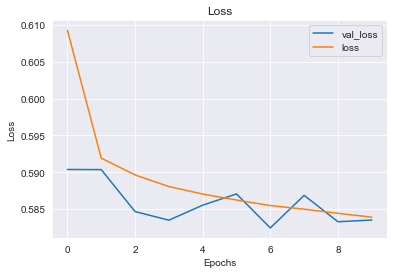

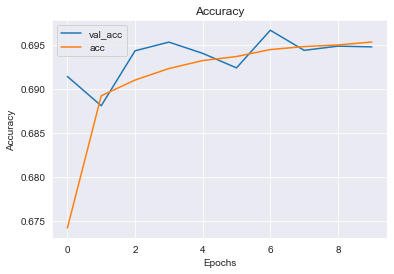

In [78]:
visualize_training_results(results4)

In [91]:
#y_pred_m4 = model_4.predict(X_test)
#y_pred_m4 =(y_pred_m4 > 0.5)

In [ ]:
# cm_m4 = confusion_matrix(y_test, y_pred_m4)
# print(cm_m4)
# print("------------------")
# print(classification_report(y_test, y_pred_m4))

In [ ]:
# conf_matrix(cm_m4)

In [ ]:
# model_metrics(y_test, y_pred_m4)

## Model 5

In [35]:
model_5 = Sequential()

model_5.add(Dense(30, activation='relu', input_shape=(62,)))

model_5.add(Dense(10, activation='relu'))

#model_5.add(Dense(5, activation='relu'))

model_5.add(Dense(1, activation='sigmoid'))

In [36]:
model_5.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [37]:
results5 = model_5.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

Train on 2885944 samples, validate on 320661 samples
Epoch 1/10
2885944/2885944 [==============================] - 137s 48us/step - loss: 0.6143 - acc: 0.6759 - val_loss: 0.5937 - val_acc: 0.6872
Epoch 2/10
2885944/2885944 [==============================] - 136s 47us/step - loss: 0.5934 - acc: 0.6874 - val_loss: 0.5859 - val_acc: 0.6929
Epoch 3/10
2885944/2885944 [==============================] - 133s 46us/step - loss: 0.5901 - acc: 0.6900 - val_loss: 0.5895 - val_acc: 0.6902
Epoch 4/10
2885944/2885944 [==============================] - 134s 47us/step - loss: 0.5883 - acc: 0.6916 - val_loss: 0.5853 - val_acc: 0.6944
Epoch 5/10
2885944/2885944 [==============================] - 135s 47us/step - loss: 0.5868 - acc: 0.6931 - val_loss: 0.5832 - val_acc: 0.6961
Epoch 6/10
2885944/2885944 [==============================] - 133s 46us/step - loss: 0.5860 - acc: 0.6937 - val_loss: 0.5915 - val_acc: 0.6918
Epoch 7/10
2885944/2885944 [==============================] - 132s 46us/step - loss: 0.58

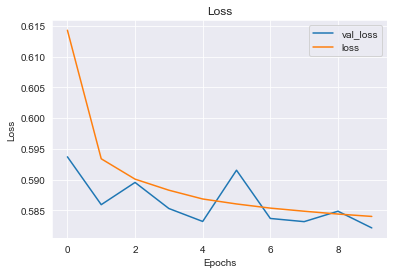

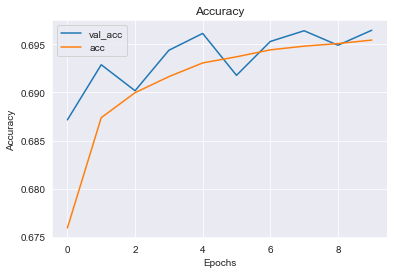

In [48]:
visualize_training_results(results5)

In [97]:
y_pred_m5 = model_5.predict(X_test)
y_pred_m5 =(y_pred_m5 > 0.5)

In [98]:
cm_m5 = confusion_matrix(y_test, y_pred_m5)
print(cm_m5)
print("------------------")
print(classification_report(y_test, y_pred_m5))

[[449374  54043]
 [189373 108862]]
------------------
              precision    recall  f1-score   support

         0.0       0.70      0.89      0.79    503417
         1.0       0.67      0.37      0.47    298235

    accuracy                           0.70    801652
   macro avg       0.69      0.63      0.63    801652
weighted avg       0.69      0.70      0.67    801652



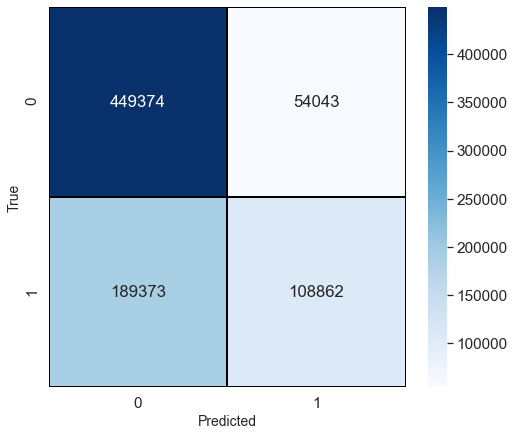

In [99]:
conf_matrix(cm_m5)

In [100]:
model_metrics(y_test, y_pred_m5)

Accuracy: 69.64 %
Precision score: 66.83 %
Recall score: 36.5 %
F1 score: 47.21 %


=========================================================================================

<b>FROM HERE ONWARDS THE MODELS HAVE A DIFFERENT SET OF FEATURES WITH ALL THE MONTHS BEING DROPPED. AFTER DOING A FEATURE SELECTION IT WAS CLEAR THAT THESE WOULD NOT HAVE ANY RELEVENCA IN THE MODEEL AND THEREFORE WOULD CAUSE NOISE.

=========================================================================================

In [53]:
y = df['FLIGHT_STATUS']
X = df.drop(['FLIGHT_STATUS', 'DEP_DELAY', 'MONTH_2', 'MONTH_3', 'MONTH_4', 'MONTH_5', 'MONTH_6', 'MONTH_7', 'MONTH_8', 'MONTH_9', 'MONTH_10', 'MONTH_11', 'MONTH_12'], axis=1)

## Model 6

In [59]:
model_6 = Sequential()

model_6.add(Dense(50, activation='relu', input_shape=(62,)))

model_6.add(Dense(30, activation='relu'))

model_6.add(Dense(15, activation='relu'))

model_6.add(Dense(1, activation='sigmoid'))

model_6.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_51 (Dense)             (None, 50)                3150      
_________________________________________________________________
dense_52 (Dense)             (None, 30)                1530      
_________________________________________________________________
dense_53 (Dense)             (None, 15)                465       
_________________________________________________________________
dense_54 (Dense)             (None, 1)                 16        
Total params: 5,161
Trainable params: 5,161
Non-trainable params: 0
_________________________________________________________________


In [60]:
model_6.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [61]:
results6 = model_6.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

Train on 2885944 samples, validate on 320661 samples
Epoch 1/5
2885944/2885944 [==============================] - 162s 56us/step - loss: 0.6066 - acc: 0.6797 - val_loss: 0.6033 - val_acc: 0.6808
Epoch 2/5
2885944/2885944 [==============================] - 129s 45us/step - loss: 0.5915 - acc: 0.6893 - val_loss: 0.5860 - val_acc: 0.6937
Epoch 3/5
2885944/2885944 [==============================] - 127s 44us/step - loss: 0.5889 - acc: 0.6915 - val_loss: 0.5852 - val_acc: 0.6937
Epoch 4/5
2885944/2885944 [==============================] - 125s 43us/step - loss: 0.5874 - acc: 0.6926 - val_loss: 0.5875 - val_acc: 0.6920
Epoch 5/5
2885944/2885944 [==============================] - 123s 43us/step - loss: 0.5865 - acc: 0.6934 - val_loss: 0.5823 - val_acc: 0.6960


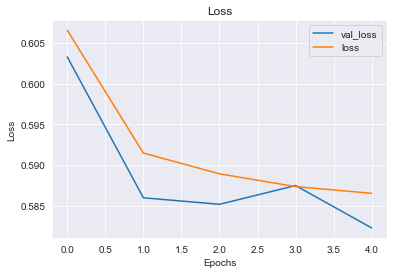

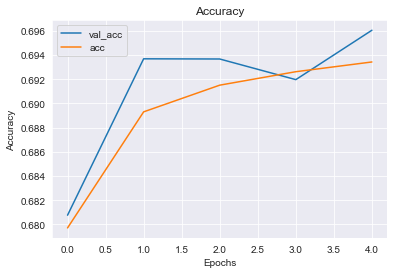

In [62]:
visualize_training_results(results6)

In [93]:
y_pred_m6 = model_6.predict(X_test)
y_pred_m6 =(y_pred_m6 > 0.5)

In [94]:
cm_m6 = confusion_matrix(y_test, y_pred_m6)
print(cm_m6)
print("------------------")
print(classification_report(y_test, y_pred_m6))

[[458940  44477]
 [198972  99263]]
------------------
              precision    recall  f1-score   support

         0.0       0.70      0.91      0.79    503417
         1.0       0.69      0.33      0.45    298235

    accuracy                           0.70    801652
   macro avg       0.69      0.62      0.62    801652
weighted avg       0.69      0.70      0.66    801652



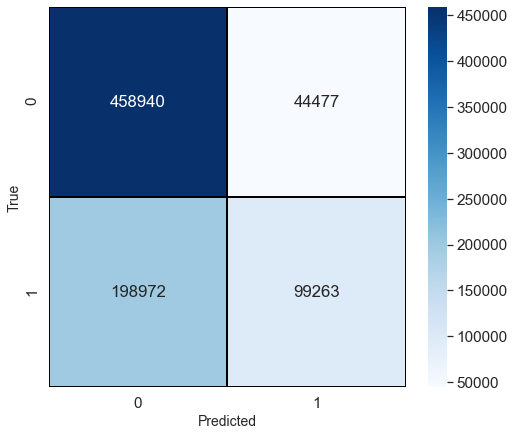

In [95]:
conf_matrix(cm_m6)

In [96]:
model_metrics(y_test, y_pred_m6)

Accuracy: 69.63 %
Precision score: 69.06 %
Recall score: 33.28 %
F1 score: 44.92 %


# Model 7

In [68]:
model_7 = Sequential()

model_7.add(Dense(50, activation='relu', input_shape=(62,)))

model_7.add(Dense(40, activation='relu'))

model_7.add(Dense(25, activation='relu'))

model_7.add(Dense(5, activation='relu'))

model_7.add(Dense(1, activation='sigmoid'))

model_7.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 50)                3150      
_________________________________________________________________
dense_61 (Dense)             (None, 40)                2040      
_________________________________________________________________
dense_62 (Dense)             (None, 25)                1025      
_________________________________________________________________
dense_63 (Dense)             (None, 5)                 130       
_________________________________________________________________
dense_64 (Dense)             (None, 1)                 6         
Total params: 6,351
Trainable params: 6,351
Non-trainable params: 0
_________________________________________________________________


In [69]:
model_7.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [70]:
results7 = model_7.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

Train on 2885944 samples, validate on 320661 samples
Epoch 1/5
2885944/2885944 [==============================] - 157s 54us/step - loss: 0.6061 - acc: 0.6808 - val_loss: 0.5882 - val_acc: 0.6922
Epoch 2/5
2885944/2885944 [==============================] - 178s 62us/step - loss: 0.5909 - acc: 0.6899 - val_loss: 0.5870 - val_acc: 0.6930
Epoch 3/5
2885944/2885944 [==============================] - 175s 61us/step - loss: 0.5886 - acc: 0.6918 - val_loss: 0.5861 - val_acc: 0.6956
Epoch 4/5
2885944/2885944 [==============================] - 172s 60us/step - loss: 0.5875 - acc: 0.6925 - val_loss: 0.5825 - val_acc: 0.6964
Epoch 5/5
2885944/2885944 [==============================] - 178s 62us/step - loss: 0.5863 - acc: 0.6937 - val_loss: 0.5828 - val_acc: 0.6957


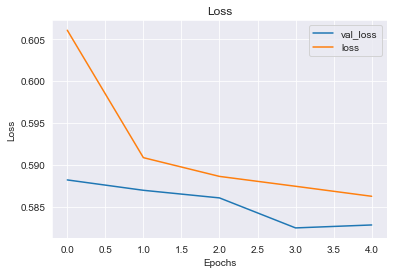

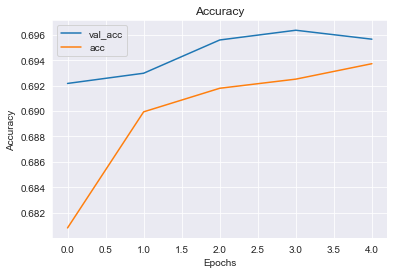

In [71]:
visualize_training_results(results7)

In [73]:
y_pred_m7 = model_7.predict(X_test)
y_pred_m7 =(y_pred_m7 > 0.5)

In [75]:
cm_m7 = confusion_matrix(y_test, y_pred_m7)
print(cm_m7)
print("------------------")
print(classification_report(y_test, y_pred_m7))

[[469002  34415]
 [209751  88484]]
------------------
              precision    recall  f1-score   support

         0.0       0.69      0.93      0.79    503417
         1.0       0.72      0.30      0.42    298235

    accuracy                           0.70    801652
   macro avg       0.71      0.61      0.61    801652
weighted avg       0.70      0.70      0.65    801652



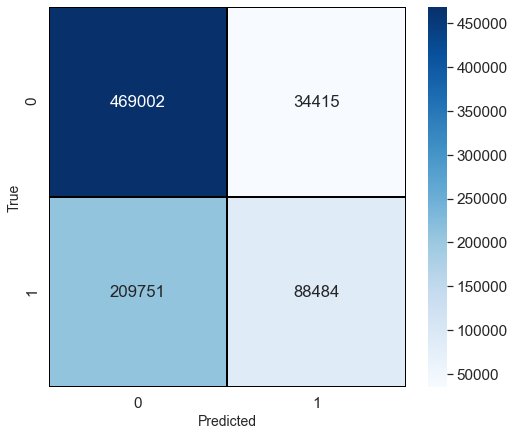

In [101]:
conf_matrix(cm_m7)

In [78]:
model_metrics(y_test, y_pred_m7)

Accuracy: 69.54 %
Precision score: 72.0 %
Recall score: 29.67 %
F1 score: 42.02 %
